<a href="https://colab.research.google.com/github/adenium18/MLprojects/blob/main/sms%20spam%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
file=files.upload()

Saving spam.csv to spam.csv


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#only a single file spam.csv is provided, so training(validatation) and testing data is within same file
df=pd.read_csv('spam.csv',encoding='latin-1')

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df['Unnamed: 2'].value_counts()

Unnamed: 2
 bt not his girlfrnd... G o o d n i g h t . . .@"                                                                                                   3
 PO Box 5249                                                                                                                                        2
this wont even start........ Datz confidence.."                                                                                                     2
GN                                                                                                                                                  2
 don't miss ur best life for anything... Gud nyt..."                                                                                                2
 but dont try to prove it..\" .Gud noon...."                                                                                                        2
 Gud night...."                                                                          

In [ ]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [ ]:
df['Unnamed: 3'].value_counts()

Unnamed: 3
 MK17 92H. 450Ppw 16"                         2
GE                                            2
 why to miss them                             1
U NO THECD ISV.IMPORTANT TOME 4 2MORO\""      1
i wil tolerat.bcs ur my someone..... But      1
 ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\""    1
whoever is the KING\"!... Gud nyt"            1
 TX 4 FONIN HON                               1
 \"OH No! COMPETITION\". Who knew             1
IåÕL CALL U\""                                1
Name: count, dtype: int64

In [ ]:
df['Unnamed: 2'].isna().sum()

5522

In [ ]:
df.shape

(5572, 5)

In [ ]:
df['Unnamed: 4'].value_counts()

Unnamed: 4
GNT:-)"                                                     2
 just Keep-in-touch\" gdeve.."                              1
 Never comfort me with a lie\" gud ni8 and sweet dreams"    1
 CALL 2MWEN IM BK FRMCLOUD 9! J X\""                        1
 one day these two will become FREINDS FOREVER!"            1
Name: count, dtype: int64

In [ ]:
df[df['v1']=='spam'].describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,747,747,5,2,0
unique,1,653,4,1,0
top,spam,Please call our customer service representativ...,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
freq,747,4,2,2,NaN


In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df['Unnamed: 2'] = df['Unnamed: 2'].astype(str)
df['Unnamed: 3'] = df['Unnamed: 3'].astype(str)
df['Unnamed: 4'] = df['Unnamed: 4'].astype(str)

In [ ]:
#columns Unnamed: 2 3 4 contain values which are str but Nan, so replacing them with ''

df['Unnamed: 2'] = df['Unnamed: 2'].fillna('')
df['Unnamed: 3'] = df['Unnamed: 3'].fillna('')
df['Unnamed: 4'] = df['Unnamed: 4'].fillna('')

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",nan,nan,nan
1,ham,Ok lar... Joking wif u oni...,nan,nan,nan
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,nan,nan,nan
3,ham,U dun say so early hor... U c already then say...,nan,nan,nan
4,ham,"Nah I don't think he goes to usf, he lives aro...",nan,nan,nan
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nan,nan,nan
5568,ham,Will Ì_ b going to esplanade fr home?,nan,nan,nan
5569,ham,"Pity, * was in mood for that. So...any other s...",nan,nan,nan
5570,ham,The guy did some bitching but I acted like i'd...,nan,nan,nan


In [ ]:
df['Combined_text'] = df[['v2', 'Unnamed: 2','Unnamed: 3','Unnamed: 4']].astype(str).agg(''.join, axis=1)

In [ ]:
df=df.drop(columns=['v2', 'Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [ ]:
df.head()

,v1,Combined_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...nannannan
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.describe()

,v1,Combined_text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call laternannannan"
freq,4825,30


In [ ]:
df['Combined_text'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5572 entries, 0 to 5571
Series name: Combined_text
Non-Null Count  Dtype 
--------------  ----- 
5572 non-null   object
dtypes: object(1)
memory usage: 43.7+ KB


In [ ]:
# apply label binarizer to target data
#spam=1, ham=0
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
df['v1']=lb.fit_transform(df['v1'])

In [ ]:
df['v1'].value_counts()
y=df['v1']
X=df.drop(columns=['v1'])

In [ ]:
lb.classes_


array(['ham', 'spam'], dtype='<U4')

# data ready to train_test_split

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4179, 1), (4179,), (1393, 1), (1393,))

In [ ]:
# Applying TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer,ENGLISH_STOP_WORDS
english_stop_words_list = list(ENGLISH_STOP_WORDS)

import re

def custom_tokenizer(text):
    # Remove numbers and punctuation marks
    text = re.sub(r'\d', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)   # Remove punctuation marks
    pattern = r'[%$&@#~!`"\'?\\/\[\]{}()<>+=\-_*^|.,:;]'

    # Remove symbols from the text
    text = re.sub(pattern, '', text)
    # Split the text into words based on whitespace
    tokens = text.split()

    return tokens


tf=TfidfVectorizer(tokenizer=custom_tokenizer,stop_words=english_stop_words_list, ngram_range=(1, 2))

In [ ]:
# Define the preprocessing steps for different columns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer

# Define the ColumnTransformer to apply different preprocessing steps to different columns
preprocessor = ColumnTransformer(transformers=[('tfidf', tf, 'Combined_text')])

# Define the final pipeline including preprocessing and model fitting
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
x_train = pipeline.fit_transform(x_train)  # Exclude non-feature columns from training data

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
x_train.shape


(4179, 32309)

In [ ]:
x_test=pipeline.transform(x_test)

# LogisticRegressiom

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=30000)

params = {'solver': ['liblinear','newton-cg','sag', 'lbfgs'],'C':[10,20,30,40,50,60,70,80,90,100],'class_weight':['balanced','None']}

grid_search_log_reg = GridSearchCV(logreg, params, verbose=3,n_jobs=-1, cv=3, scoring='accuracy', return_train_score=True)
grid_search_log_reg.fit(x_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/skl

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=30000), n_jobs=-1,
             param_grid={'C': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'class_weight': ['balanced', 'None'],
                         'solver': ['liblinear', 'newton-cg', 'sag', 'lbfgs']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
pd.DataFrame(grid_search_log_reg.cv_results_, columns=['params','mean_fit_time','mean_test_score','mean_train_score','rank_test_score']).sort_values(by='rank_test_score').set_index('params').head()

,mean_fit_time,mean_test_score,mean_train_score,rank_test_score
params,,,,
"{'C': 40, 'class_weight': 'balanced', 'solver': 'sag'}",0.272107,0.973199,1.0,1
"{'C': 90, 'class_weight': 'balanced', 'solver': 'liblinear'}",0.034443,0.973199,1.0,1
"{'C': 90, 'class_weight': 'balanced', 'solver': 'newton-cg'}",0.124909,0.973199,1.0,1
"{'C': 40, 'class_weight': 'balanced', 'solver': 'lbfgs'}",0.415287,0.973199,1.0,1
"{'C': 70, 'class_weight': 'balanced', 'solver': 'lbfgs'}",0.534428,0.973199,1.0,1


In [ ]:
grid_search_log_reg.best_estimator_

LogisticRegression(C=20, class_weight='balanced', max_iter=30000,
                   solver='liblinear')

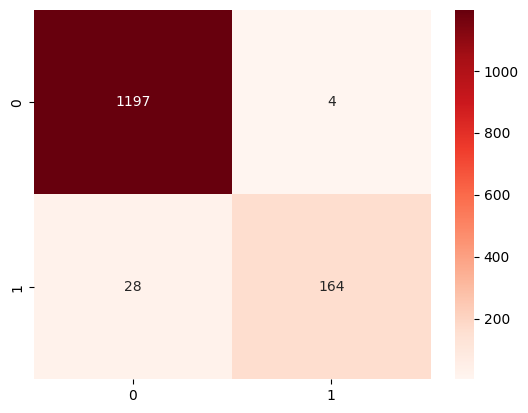

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1201
           1       0.98      0.85      0.91       192

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [ ]:
lr=LogisticRegression(C=20, max_iter=30000,solver='liblinear')
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

#confusion matrix and classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='.4g', cmap='Reds')
plt.show()
print(classification_report(y_test,y_pred))

#linearSVC

In [ ]:
from sklearn.svm import LinearSVC
svc=LinearSVC(max_iter=30000)
from sklearn.model_selection import GridSearchCV
params={'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
        'penalty':['l2'],
       }
gsvc=GridSearchCV(svc,params,cv=3,verbose=3,return_train_score=True)
gsvc.fit(x_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END C=0.1, penalty=l2;, score=(train=0.942, test=0.915) total time=   0.0s
[CV 2/3] END C=0.1, penalty=l2;, score=(train=0.943, test=0.920) total time=   0.0s
[CV 3/3] END C=0.1, penalty=l2;, score=(train=0.944, test=0.922) total time=   0.0s
[CV 1/3] END C=0.2, penalty=l2;, score=(train=0.980, test=0.946) total time=   0.0s
[CV 2/3] END C=0.2, penalty=l2;, score=(train=0.980, test=0.948) total time=   0.0s
[CV 3/3] END C=0.2, penalty=l2;, score=(train=0.980, test=0.946) total time=   0.0s
[CV 1/3] END C=0.3, penalty=l2;, score=(train=0.991, test=0.954) total time=   0.0s
[CV 2/3] END C=0.3, penalty=l2;, score=(train=0.992, test=0.950) total time=   0.0s
[CV 3/3] END C=0.3, penalty=l2;, score=(train=0.991, test=0.958) total time=   0.0s
[CV 1/3] END C=0.4, penalty=l2;, score=(train=0.997, test=0.958) total time=   0.0s
[CV 2/3] END C=0.4, penalty=l2;, score=(train=0.997, test=0.958) total time=   0.0s
[CV 3/3] END C=0

GridSearchCV(cv=3, estimator=LinearSVC(max_iter=30000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'penalty': ['l2']},
             return_train_score=True, verbose=3)

In [ ]:
pd.DataFrame(gsvc.cv_results_, columns=['params','mean_fit_time','mean_test_score','mean_train_score','rank_test_score']).sort_values(by='rank_test_score').set_index('params').head()

,mean_fit_time,mean_test_score,mean_train_score,rank_test_score
params,,,,
"{'C': 0.8, 'penalty': 'l2'}",0.054724,0.967456,1.000000,1
"{'C': 0.9, 'penalty': 'l2'}",0.058415,0.967456,1.000000,1
"{'C': 0.7, 'penalty': 'l2'}",0.060152,0.966260,1.000000,3
"{'C': 0.6, 'penalty': 'l2'}",0.050124,0.964585,1.000000,4
"{'C': 0.5, 'penalty': 'l2'}",0.042373,0.962192,0.999761,5


In [ ]:
svc=gsvc.best_params_
svc

{'C': 0.8, 'penalty': 'l2'}

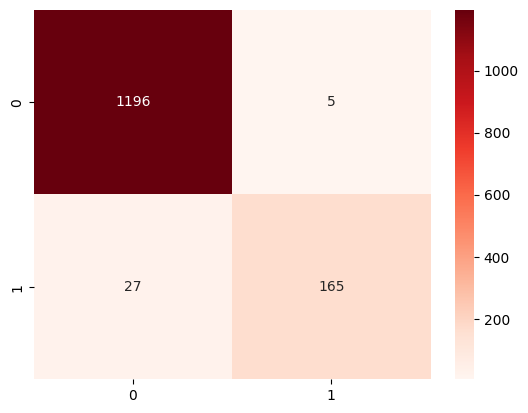

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1201
           1       0.97      0.86      0.91       192

    accuracy                           0.98      1393
   macro avg       0.97      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [ ]:

from sklearn.svm import LinearSVC


svc = LinearSVC(C=0.8,penalty='l2', max_iter=100000)
svc.fit(x_train, y_train)
pred = svc.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix, annot=True, fmt='.4g', cmap='Reds')
plt.show()
print(classification_report(y_test,pred))

# XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
params={'max_depth':[40,50,60]}
g_xgb=GridSearchCV(xgb,params,cv=3,verbose=3,return_train_score=True)
g_xgb.fit(x_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END ..max_depth=40;, score=(train=0.996, test=0.961) total time=  15.8s
[CV 2/3] END ..max_depth=40;, score=(train=0.995, test=0.973) total time=  11.9s
[CV 3/3] END ..max_depth=40;, score=(train=0.994, test=0.967) total time=  11.2s
[CV 1/3] END ..max_depth=50;, score=(train=0.996, test=0.966) total time=  14.8s
[CV 2/3] END ..max_depth=50;, score=(train=0.995, test=0.975) total time=  18.6s
[CV 3/3] END ..max_depth=50;, score=(train=0.994, test=0.967) total time=  24.6s
[CV 1/3] END ..max_depth=60;, score=(train=0.996, test=0.966) total time=  10.7s
[CV 2/3] END ..max_depth=60;, score=(train=0.995, test=0.975) total time=  10.8s
[CV 3/3] END ..max_depth=60;, score=(train=0.994, test=0.967) total time=  10.4s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [40, 50, 60]}, return_train_score=True,
             verbose=3)

In [ ]:
pd.DataFrame(g_xgb.cv_results_, columns=['params','mean_fit_time','mean_test_score','mean_train_score','rank_test_score']).sort_values(by='rank_test_score').set_index('params').head()

,mean_fit_time,mean_test_score,mean_train_score,rank_test_score
params,,,,
{'max_depth': 50},19.325599,0.969371,0.994975,1
{'max_depth': 60},10.623700,0.969371,0.994975,1
{'max_depth': 40},12.956666,0.967217,0.995334,3


In [ ]:
g_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb=XGBClassifier(max_depth=50)
xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)

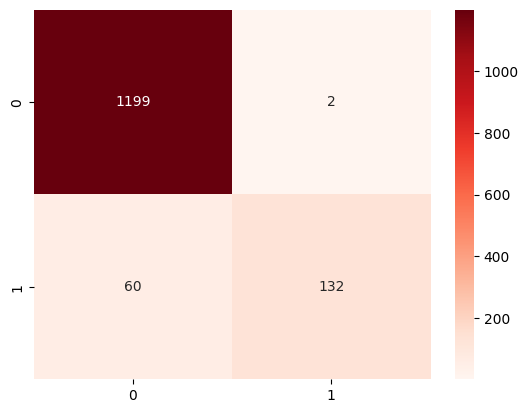

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1201
           1       0.99      0.69      0.81       192

    accuracy                           0.96      1393
   macro avg       0.97      0.84      0.89      1393
weighted avg       0.96      0.96      0.95      1393



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix, annot=True, fmt='.4g', cmap='Reds')
plt.show()
print(classification_report(y_test,pred))

# So out of every model tested LOGISTIC REGRESSION works very well in terms of accuracy